## Helper and Utilities Functions

In [1]:
def print_and_save_image(image, output_path):
    ### Import all required library
    import matplotlib.pyplot as plt
    
    ### Process Helper Functionality
    (height, width) = image.shape
    
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    plt.figure(figsize=(width*px, height*px))
    plt.axis("off")
    plt.imshow(image, cmap='gray')
    plt.savefig(output_path)

In [2]:
def print_and_save_image_boundary(source_image, image, output_path):
    ### Import all required library
    import matplotlib.pyplot as plt
    from skimage.segmentation import mark_boundaries
    
    ### Process Helper Functionality
    (height, width) = image.shape
    
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    plt.figure(figsize=(width*px, height*px))
    plt.axis("off")
    plt.imshow(mark_boundaries(source_image, image))
    plt.savefig(output_path)

In [3]:
## Sobel Operator (Completed)
## Input 'both', 'xaxis', or 'yaxis' for directions
def sobel_operator_methods(direction, input_path, output_basePath):
    # Import libraries required
    import numpy as np
    import scipy
    import scipy.signal as sig
    import imageio
    from matplotlib import pyplot as plt
    
    # With mode='L', we force the image to be parsed in the grayscale, so 
    # it is actually unncessary to convert the photo color beforehand
    img = imageio.v3.imread(input_path)
    print_and_save_image(img, f'{output_basePath}/sobel_input.tiff')

    if (direction == 'xaxis' or direction == 'both'):
        # Define the Sobel Operator Kernels and Compute the Results in x-axis
        kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        G_x = sig.convolve2d(img, kernel_x, mode='same')
        print_and_save_image((G_x + 255) / 2, f"{output_basePath}/sobel_x.tiff")
    
    if (direction == 'yaxis' or direction == 'both'):
        # Define the Sobel Operator Kernels and Compute the Results in y-axis
        kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
        G_y = sig.convolve2d(img, kernel_y, mode='same')
        print_and_save_image((G_y + 255) / 2, f"{output_basePath}/sobel_y.tiff")

    if (direction == 'both'):
        # Plot them!
        fig = plt.figure()
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)

        # Actually, plt.imshow() can handle the value scale well even if I
        # don't do the transformation (G_x + 255)/2
        ax1.imshow((G_x + 255) / 2, cmap='gray'); ax1.set_xlabel('Gx')
        ax2.imshow((G_y + 255) / 2, cmap='gray'); ax2.set_xlabel('Gy')
        plt.savefig(f'{output_basePath}/sobel_combined.tiff')

In [23]:
## Histogram of Oriented Gradients (HOG) by skimage library (Completed)
## Source: https://towardsdatascience.com/hog-histogram-of-oriented-gradients-67ecd887675f
## Reference: https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/
def HOG_by_skimage(input_path, output_basePath, pixelPerCell, cellPerBlock):
    # Import libraries required
    import imageio
    from skimage.feature import hog
    import numpy as np
    
    # With mode='L', we force the image to be parsed in the grayscale, so 
    # it is actually unncessary to convert the photo color beforehand
    img = imageio.v3.imread(input_path)
    print_and_save_image(img, f'{output_basePath}/HOG_input.tiff')
    
    # Creating and Visualizing HOG Features
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(pixelPerCell, pixelPerCell), 
                        cells_per_block=(cellPerBlock, cellPerBlock), visualize=True)
    
    #for x in hog_image:
    #    for y in x:
    #        if (y / 255 > 0.5):
    #            y = 255;
    #        else:
    #            y = 0;
    
    # print_and_save_image(hog_image, f"{output_basePath}/HOG_{pixelPerCell}pixelPerCell_{cellPerBlock}cellPerBlock.tiff")
    print_and_save_image(hog_image, f'{output_basePath}/HOG.tiff')
    
    import numpy as np
    np.savetxt('/Users/victor-tien/Desktop/data.csv', hog_image)

In [5]:
## Image Segmentation with Felzenszwalb's Algorithm
def Felzenszwalb_algorithm(input_path, output_basePath, scaling):
    # Import libraries required
    import imageio
    import skimage.segmentation
    from matplotlib import pyplot as plt
    from skimage.segmentation import mark_boundaries

    # With mode='L', we force the image to be parsed in the grayscale, so 
    # it is actually unncessary to convert the photo color beforehand
    img = imageio.v3.imread(input_path)
    print_and_save_image(img, f'{output_basePath}/Felzenszwalb_input.tiff')
    segment_mask = skimage.segmentation.felzenszwalb(img, scale=scaling)
    print_and_save_image(segment_mask, f"{output_basePath}/Felzenszwalb_output.tiff")
    print_and_save_image_boundary(img, segment_mask, f"{output_basePath}/Felzenszwalb_boundary.tiff")

In [42]:
## Histogram of Oriented Gradients (HOG) by manual calculation (In Progress)
## Source: https://github.com/ahmedfgad/HOGNumPy/tree/master
def calculate_gradient(img, template):
    import numpy
    
    ts = template.size #Number of elements in the template (3).
    #New padded array to hold the resultant gradient image.
    new_img = numpy.zeros((img.shape[0]+ts-1, 
                           img.shape[1]+ts-1))
    new_img[numpy.uint16((ts-1)/2.0):img.shape[0]+numpy.uint16((ts-1)/2.0), 
            numpy.uint16((ts-1)/2.0):img.shape[1]+numpy.uint16((ts-1)/2.0)] = img
    result = numpy.zeros((new_img.shape))
    
    for r in numpy.uint16(numpy.arange((ts-1)/2.0, img.shape[0]+(ts-1)/2.0)):
        for c in numpy.uint16(numpy.arange((ts-1)/2.0, 
                              img.shape[1]+(ts-1)/2.0)):
            curr_region = new_img[r-numpy.uint16((ts-1)/2.0):r+numpy.uint16((ts-1)/2.0)+1, 
                                  c-numpy.uint16((ts-1)/2.0):c+numpy.uint16((ts-1)/2.0)+1]
            curr_result = curr_region * template
            score = numpy.sum(curr_result)
            result[r, c] = score
    #Result of the same size as the original image after removing the padding.
    result_img = result[numpy.uint16((ts-1)/2.0):result.shape[0]-numpy.uint16((ts-1)/2.0), 
                        numpy.uint16((ts-1)/2.0):result.shape[1]-numpy.uint16((ts-1)/2.0)]
    return result_img

def gradient_magnitude(horizontal_gradient, vertical_gradient, integer=False):
    import numpy
    
    horizontal_gradient_square = numpy.power(horizontal_gradient, 2)
    vertical_gradient_square = numpy.power(vertical_gradient, 2)
    sum_squares = horizontal_gradient_square + vertical_gradient_square
    grad_magnitude = numpy.sqrt(sum_squares)
    if integer: grad_magnitude = (numpy.rint(grad_magnitude)).astype(int)
    return grad_magnitude

def gradient_direction(horizontal_gradient, vertical_gradient, integer=False):
    import numpy
    
    grad_direction = numpy.arctan(vertical_gradient/(horizontal_gradient+0.00000001))
    grad_direction = numpy.rad2deg(grad_direction)
    grad_direction = grad_direction%180
    if integer: grad_direction = (numpy.rint(grad_direction)).astype(int)
    return grad_direction

def HOG_cell_histogram(cell_direction, cell_magnitude, hist_bins):
    import numpy
    
    HOG_cell_hist = numpy.zeros(shape=(hist_bins.size))
    cell_size = cell_direction.shape[0]
    
    for row_idx in range(cell_size):
        for col_idx in range(cell_size):
            curr_direction = cell_direction[row_idx, col_idx]
            curr_magnitude = cell_magnitude[row_idx, col_idx]
    
            diff = numpy.abs(curr_direction - hist_bins)
            
            if curr_direction < hist_bins[0]:
                first_bin_idx = 0
                second_bin_idx = hist_bins.size-1
            elif curr_direction > hist_bins[-1]:
                first_bin_idx = hist_bins.size-1
                second_bin_idx = 0
            else:
                first_bin_idx = numpy.where(diff == numpy.min(diff))[0][0]
                temp = hist_bins[[(first_bin_idx-1)%hist_bins.size, (first_bin_idx+1)%hist_bins.size]]
                temp2 = numpy.abs(curr_direction - temp)
                res = numpy.where(temp2 == numpy.min(temp2))[0][0]
                if res == 0 and first_bin_idx != 0:
                    second_bin_idx = first_bin_idx-1
                else:
                    second_bin_idx = first_bin_idx+1
            
            first_bin_value = hist_bins[first_bin_idx]
            second_bin_value = hist_bins[second_bin_idx]
            HOG_cell_hist[first_bin_idx] = HOG_cell_hist[first_bin_idx] + (numpy.abs(curr_direction - first_bin_value)/(180.0/hist_bins.size)) * curr_magnitude
            HOG_cell_hist[second_bin_idx] = HOG_cell_hist[second_bin_idx] + (numpy.abs(curr_direction - second_bin_value)/(180.0/hist_bins.size)) * curr_magnitude
    return HOG_cell_hist


## Application Code

In [19]:
def convertImageToGrayScale(input_path, output_basePath):
    import cv2
    import numpy as np
    
    img = cv2.imread(input_path)
    grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    print_and_save_image(grey_image, f"{output_basePath}/greyScale_image.tiff")
    np.savetxt('/Users/victor-tien/Desktop/greyScaleImage.csv', grey_image)

In [53]:
def saveFileToCSV(document, output_basePath, fileName, digits='%05.2f'):
    import numpy as np
    np.set_printoptions(suppress=True)
    np.savetxt(f"{output_basePath}/{fileName}.csv", document, digits)

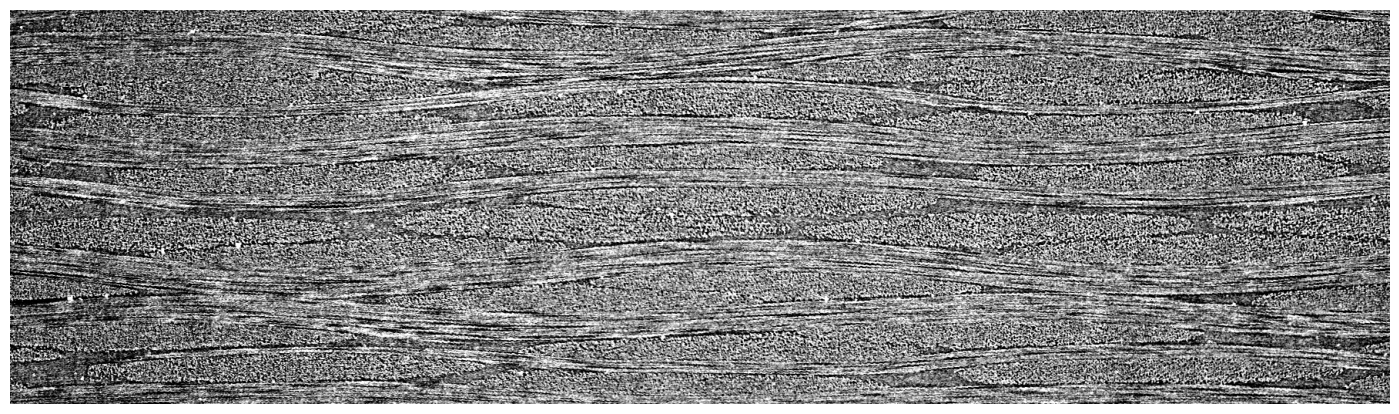

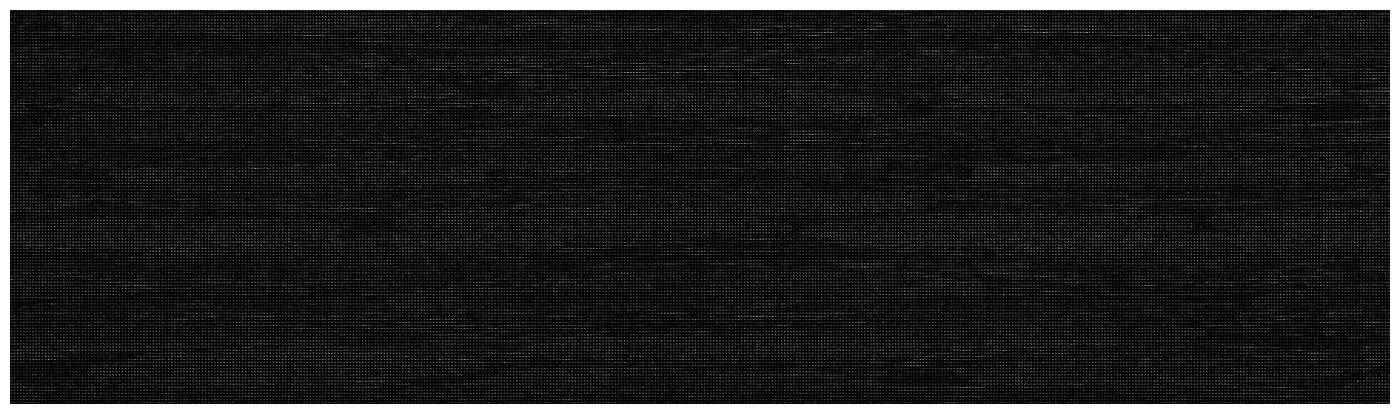

In [24]:
rootDirectory = '/Users/victor-tien/Desktop/Thesis/CTScanAnalysis/Data/'
CTImageDirectory = 'T300_3900_0UFS_OriginalSlices'
subDirectory = 'rawSlices'
file = 'ReorientedWarpRawCropSlice_910.tif'
imageDir = rootDirectory + CTImageDirectory + '/' + subDirectory + '/' + file
HOG_by_skimage(imageDir, '/Users/victor-tien/Desktop', 4, 2)
# sobel_operator_methods('both', imageDir, '/Users/victor-tien/Desktop')
# Felzenszwalb_algorithm(imageDir, '/Users/victor-tien/Desktop', 650)
#convertImageToGrayScale(imageDir, '/Users/victor-tien/Desktop')

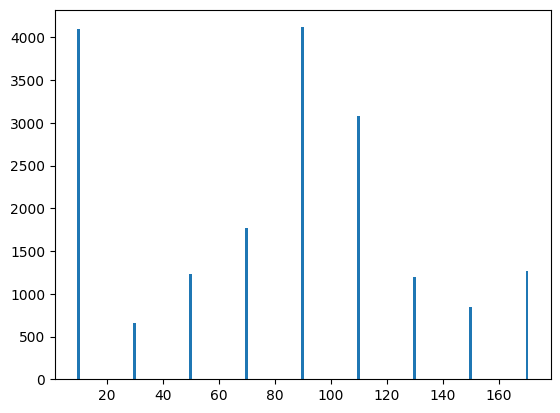

In [56]:
import numpy
import matplotlib.pyplot
import cv2

img = cv2.imread(imageDir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = skimage.io.imread(imageDir)
#img = skimage.color.rgb2gray(img)

horizontal_mask = numpy.array([-1, 0, 1])
vertical_mask = numpy.array([[-1],
                             [0],
                             [1]])

horizontal_gradient = calculate_gradient(img, horizontal_mask)
vertical_gradient = calculate_gradient(img, vertical_mask)

grad_magnitude = gradient_magnitude(horizontal_gradient, vertical_gradient)
grad_direction = gradient_direction(horizontal_gradient, vertical_gradient)

grad_direction = grad_direction % 180
hist_bins = numpy.array([10,30,50,70,90,110,130,150,170])

saveFileToCSV(grad_magnitude, '/Users/victor-tien/Desktop', 'gradient_magnitude', '%05.2f')
saveFileToCSV(grad_direction, '/Users/victor-tien/Desktop', 'gradient_direction', '%03.0f')

# Histogram of the first cell in the first block.
cell_direction = grad_direction[:8, :8]
cell_magnitude = grad_magnitude[:8, :8]
HOG_cell_hist = HOG_cell_histogram(cell_direction, cell_magnitude, hist_bins)

matplotlib.pyplot.bar(x=hist_bins, height=HOG_cell_hist, align="center", width=1)
matplotlib.pyplot.show()

In [ ]:
- weight trust of training data ? (manually marking and computer annotated)
- better to false negative
- single number of error
- two tows seperate but being called the same ??
- qualitative discuss different types of error and how to mitigate it
- manually visualise the output



- bringing 3D into 2D (2.5D sweet spot)
- incorporate different image processing into the data preparation phase
- type of info carried in the slicing
- (fly through, translate 3D into time dimension)



- narrow down scope